In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from scipy.optimize import curve_fit
# Should you switch to the refined boxE? Ask Dr. Corlies @ next meeting

In [3]:
%%capture --no-display
new_array = ['_0405','_0607','_0809','_1011','_1213','_1415','_1617']
df_list = []
for number in new_array:
    new_string = 'df'+number+' = '+'pd.read_csv("c_data/data'+number+'.csv")'
    exec(new_string)
    df = 'df'+number
    new_df = locals()[df]
    df_list.append(new_df)

vims_wave = np.loadtxt('vims_wave.txt')

for df in df_list:
    for i in range(len(df['spectrum'])):
        df['spectrum'][i] = np.array([float(x) for x in df['spectrum'][i][1:-1].split(',')])

spec_list = []
for number in new_array:
    my_string = 'spec'+number+" = df"+number+"['spectrum']"
    exec(my_string)
    spec = 'spec'+number
    new_spec = locals()[spec]
    spec_list.append(new_spec)

spec_list = []
for number in new_array:
    my_string = 'spec'+number+" = df"+number+"['spectrum']"
    exec(my_string)
    spec = 'spec'+number
    new_spec = locals()[spec]
    spec_list.append(new_spec)

In [4]:
def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

band_channels = [29,30,31,32,33,34,46,47,48,49,50,51,52,53,54,55,56,57,58,59,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,102,103,104,105]

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_fit = powerlaw(vims_wave,*my_fit)
    return final_fit

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra


In [5]:
spectra_list = []
for number in new_array:
    new_string = 'spectra'+number+' = custom_fit(spec'+number+')'
    exec(new_string)
    spectrum = 'spectra'+number
    new_spectrum = locals()[spectrum]
    spectra_list.append(new_spectrum)

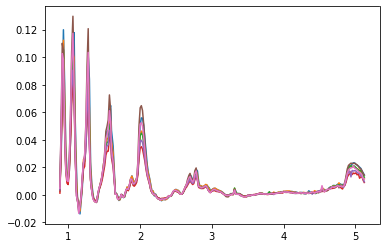

In [6]:
%matplotlib inline
x = vims_wave
for spectra in spectra_list:
    plt.plot(x,spectra)
plt.show()

### Why does the Gaussian output semi-work for all channels, but simply substituting it for the micron_window array 

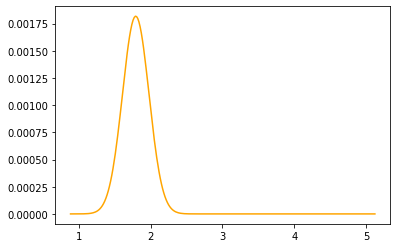

In [7]:
%matplotlib inline
x = vims_wave
y = spectra_0405
z = gaussian(x,x[56],x[81],np.std(x[56:81]))

my_fit,_ = curve_fit(gaussian,x[band_channels],y[band_channels],maxfev=2000)

plt.plot(x,gaussian(x,*my_fit),c='orange')
plt.show()

In [8]:
micron_window = list(range(56,81))

In [9]:
new_list = np.sort(band_channels+list(range(60,77)))

In [10]:
print(new_list)

[ 29  30  31  32  33  34  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95 102 103 104 105]


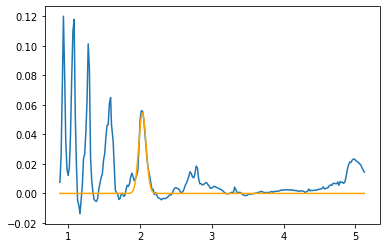

In [11]:
#Make the spectra part of the micron_window AND the band_channels list if possible?
%matplotlib inline
x = vims_wave
y = spectra_0405
z = gaussian(x,x[56],x[81],np.std(x[56:81]))

my_fit,_ = curve_fit(gaussian,x[new_list],y[new_list],maxfev=2000)

plt.plot(x,y)
plt.plot(x,gaussian(x,*my_fit),c='orange')
plt.show()

In [12]:
for object in (x[56],x[81],np.std(x[56:81]),x[band_channels],y[band_channels]):
    print(np.shape(object))

()
()
()
(42,)
(42,)
